Problem Statement 21: 

Create stored functions for the following:


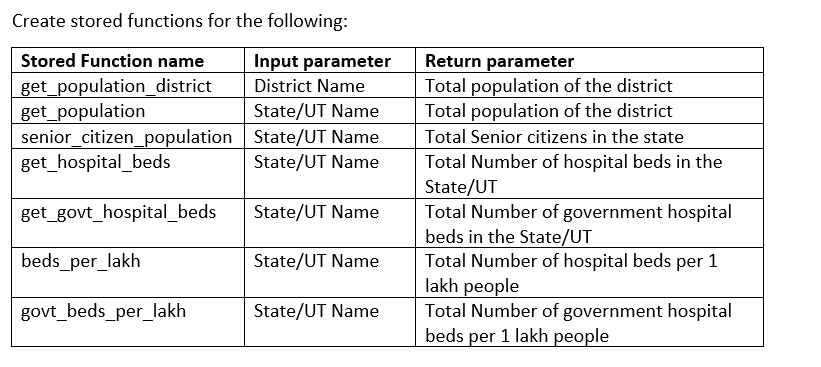

1) get_population_district

In [1]:
import pymysql
import pandas as pd

In [2]:
conn=pymysql.connect(
    host='localhost',
    user='root',
    password='Admin@123',
    db='python_project1')

In [39]:
query='CREATE PROCEDURE Get_population_district(Dist VARCHAR(50)) BEGIN SELECT sum(Population) from census where District=dist; END;'

In [3]:
cursor=conn.cursor()

In [41]:
cursor.execute(query)

0

In [6]:
query="call Get_population_district('Guntur')"

In [7]:
cursor.execute(query)

1

In [8]:
select=cursor.fetchall()

In [10]:
print('population of district is',select[0][0])

population of district is 4887813.0


2) get_population

In [50]:
query2='CREATE PROCEDURE get_population(state varchar(50)) begin select District,sum(Population) from census where StateorUT=state group by District; END;'

In [51]:
cursor.execute(query2)

0

In [12]:
query2="call get_population('Karnataka')"

In [13]:
cursor.execute(query2)

30

In [14]:
select=cursor.fetchall()

In [15]:
df=pd.DataFrame(select,columns=['District','Population'])
df

District  Population
0           Bagalkot  1889752.00
1          Bangalore  9621551.00
2    Bangalore Rural   990923.00
3            Belgaum  4779661.00
4            Bellary  2452595.00
5              Bidar  1703300.00
6            Bijapur  2177331.00
7     Chamarajanagar  1020791.00
8    Chikkaballapura  1255104.00
9        Chikmagalur  1137961.00
10       Chitradurga  1659456.00
11  Dakshina Kannada  2089649.00
12        Davanagere  1945497.00
13           Dharwad  1892031.25
14             Gadag  1064570.00
15          Gulbarga  2566326.00
16            Hassan  1776421.00
17            Haveri  1597668.00
18            Kodagu   554519.00
19             Kolar  1536401.00
20            Koppal  1389920.00
21            Mandya  1805769.00
22            Mysore  3001127.00
23           Raichur  1928812.00
24        Ramanagara  1082636.00
25           Shimoga  1752753.00
26            Tumkur  2678980.00
27             Udupi  1177361.00
28    Uttara Kannada  1437169.00
29            Yadgir  1174271.00

3) Senior citizen Population

In [56]:
query='CREATE PROCEDURE senior_citizen_population(state varchar(50)) begin select sum(Senior_Citizen) from census where StateorUT=state; END;'

In [57]:
cursor.execute(query)

0

In [18]:
query2='CALL senior_citizen_population("Andhra Pradesh")'

In [19]:
cursor.execute(query2)

1

In [20]:
select=cursor.fetchall()

In [22]:
print("Senior citizen population of Andhra Pradesh",select[0][0])

Senior citizen population of Andhra Pradesh 9034557.0


4) get_hospital_beds

In [81]:
query4='CREATE PROCEDURE get_hospital_beds(state varchar(50)) begin select HospitalBeds from hospitals where StateorUT=state; END;'

In [82]:
cursor.execute(query4)

0

In [86]:
query4='call get_hospital_beds("Bihar")'

In [87]:
cursor.execute(query4)

1

In [88]:
select=cursor.fetchall()

In [89]:
print(select)

((17796,),)


5) Get government hospital beds

In [90]:
query5='CREATE PROCEDURE get_govt_hospital_beds(state varchar(50)) begin select bedsum from government_hospitals where StateorUT=state; END;'

In [91]:
cursor.execute(query5)

0

In [23]:
query5='call get_govt_hospital_beds("Tamil Nadu")'

In [24]:
cursor.execute(query5)

1

In [25]:
select=cursor.fetchall()
print("Government Hospital Beds in Tamil Nadu are",select[0][0])

Government Hospital Beds in Tamil Nadu are 77532


6) Beds per 1 lakh people

In [102]:
query6='CREATE PROCEDURE beds_per_lakh(state varchar(50)) begin select round((HospitalBeds/Population)*100000) from hospitals where StateorUT=state; END;'

In [103]:
cursor.execute(query6)

0

In [44]:
query6='call beds_per_lakh("Karnataka")'

In [46]:
cursor.execute(query6)
select=cursor.fetchall()
for x in select:
    print("beds per lakh in Karnataka",x[0])

beds per lakh in Karnataka 92


7. GOVERNMENT BEDS PER 1 LAKH PEOPLE

In [114]:
query7='CREATE PROCEDURE govt_beds_per_lakh(state varchar(50)) begin select round((gh.bedsum/h.Population)*100000) from hospitals h join government_hospitals gh on gh.StateorUT=h.StateorUT where gh.StateorUT=state; END;'

In [115]:
cursor.execute(query7)

0

In [49]:
query7='call govt_beds_per_lakh("Tamil Nadu")'

In [50]:
cursor.execute(query7)
select=cursor.fetchall()
for x in select:
    print("GOVERNMENT BEDS PER 1 LAKH PEOPLE IN KARNATAKA",x[0])

GOVERNMENT BEDS PER 1 LAKH PEOPLE IN KARNATAKA 107


**22**

It was reported* that in the north-eastern states, senior citizens are facing some issues in getting beds in a government hospital. Amir, from the department of healthcare, has requested a report on the healthcare situation in the north-eastern states.


The north-eastern states are listed in (Data/north_east_states.txt). Read the file and extract the state names using python and write a query to find the following information about those states from the database. Use the stored functions created earlier wherever relevant.

*	State Name
*	Population
*	Senior Citizen Population
*	Number of Government Hospital
*	Number of Government Hospital Beds
*	Number of Government Hospital beds for 1 Lakh population 
(Round the number to the nearest integer)
*	Number of Government Hospital beds for 1 Lakh senior citizen
(Round the number to the nearest integer)

The rows should be sorted by the number of Government Hospital beds for 1 Lakh senior citizens in ascending order.



In [25]:
import pymysql
import pandas as pd

In [26]:
conn=pymysql.connect(
    host='localhost',
    user='root',
    password='Admin@123',
    db='python_project1')

In [27]:
df=pd.read_csv('Data/NorthEast.txt',header=None)
df

0
0  Arunachal Pradesh
1            Mizoram
2            Manipur
3            Tripura
4              Assam
5          Meghalaya
6           Nagaland
7             Sikkim

In [28]:
list1=df[0].to_list()
list1

['Arunachal Pradesh',
 'Mizoram',
 'Manipur',
 'Tripura',
 'Assam',
 'Meghalaya',
 'Nagaland',
 'Sikkim']

In [29]:
cursor=conn.cursor()

In [30]:
tup =(list1,)

In [31]:
df

0
0  Arunachal Pradesh
1            Mizoram
2            Manipur
3            Tripura
4              Assam
5          Meghalaya
6           Nagaland
7             Sikkim

In [32]:
df
df.columns=['State']

In [33]:
tup =(list1,)

In [34]:
tup

(['Arunachal Pradesh',
  'Mizoram',
  'Manipur',
  'Tripura',
  'Assam',
  'Meghalaya',
  'Nagaland',
  'Sikkim'],)

In [43]:
#population
for x in list1:
    sum1=0
    cursor.callproc('get_population', [x])
    rows = cursor.fetchall()
    for y in range(len(rows)):
        sum1+=rows[y][1]
    df.loc[df['State']==x,'Population']=sum1

In [44]:
df

State  Population
0  Arunachal Pradesh   1383727.0
1            Mizoram   1097206.0
2            Manipur   2855794.0
3            Tripura   3673917.0
4              Assam  31205576.0
5          Meghalaya   2966889.0
6           Nagaland   1978502.0
7             Sikkim    610577.0

In [45]:
#senior citizen population

In [51]:
for x in list1:
    sum1=0
    cursor.callproc('senior_citizen_population', [x])
    rows = cursor.fetchall()
    df.loc[df['State']==x,'senior_citizen_population']=rows[0]

In [52]:
df

State  Population  senior_citizen_population
0  Arunachal Pradesh   1383727.0                   139635.0
1            Mizoram   1097206.0                   144061.0
2            Manipur   2855794.0                   409796.0
3            Tripura   3673917.0                   568604.0
4              Assam  31205576.0                  4127732.0
5          Meghalaya   2966889.0                   287754.0
6           Nagaland   1978502.0                   211983.0
7             Sikkim    610577.0                    82725.0

In [19]:
#government hospital beds

In [53]:
for x in list1:
    cursor.callproc('get_govt_hospital_beds', [x])
    rows = cursor.fetchall()
    df.loc[df['State']==x,'Government_Hospitals_Beds']=rows[0]

In [54]:
df

State  Population  senior_citizen_population  \
0  Arunachal Pradesh   1383727.0                   139635.0   
1            Mizoram   1097206.0                   144061.0   
2            Manipur   2855794.0                   409796.0   
3            Tripura   3673917.0                   568604.0   
4              Assam  31205576.0                  4127732.0   
5          Meghalaya   2966889.0                   287754.0   
6           Nagaland   1978502.0                   211983.0   
7             Sikkim    610577.0                    82725.0   

   Government_Hospitals_Beds  
0                     2404.0  
1                     1997.0  
2                     1427.0  
3                     4417.0  
4                    17142.0  
5                     4457.0  
6                     1880.0  
7                     1560.0

In [64]:
#number of beds per 1 lakh

In [56]:
for x in list1:
    cursor.callproc('beds_per_lakh',[x])
    rows=cursor.fetchall()
    df.loc[df['State']==x,'Beds_per_lakh']=rows[0]
df

State  Population  senior_citizen_population  \
0  Arunachal Pradesh   1383727.0                   139635.0   
1            Mizoram   1097206.0                   144061.0   
2            Manipur   2855794.0                   409796.0   
3            Tripura   3673917.0                   568604.0   
4              Assam  31205576.0                  4127732.0   
5          Meghalaya   2966889.0                   287754.0   
6           Nagaland   1978502.0                   211983.0   
7             Sikkim    610577.0                    82725.0   

   Government_Hospitals_Beds Beds_per_lakh  
0                     2404.0           168  
1                     1997.0           211  
2                     1427.0            90  
3                     4417.0           133  
4                    17142.0            61  
5                     4457.0           155  
6                     1880.0            98  
7                     1560.0           188

In [67]:
#number of government hospital 

In [57]:
sql='select StateorUT,Hospital_Sum from government_hospitals where StateorUT in %s'
cursor.execute(sql, (tuple(list1),))
select=cursor.fetchall()

In [58]:
for x in select:
    print(x)

('Arunachal Pradesh', 218)
('Assam', 1226)
('Manipur', 30)
('Meghalaya', 157)
('Mizoram', 90)
('Nagaland', 36)
('Sikkim', 33)
('Tripura', 155)


In [59]:
for x in select:
    df.loc[df['State']==x[0],'government_hospitals']=x[1]

In [60]:
df

State  Population  senior_citizen_population  \
0  Arunachal Pradesh   1383727.0                   139635.0   
1            Mizoram   1097206.0                   144061.0   
2            Manipur   2855794.0                   409796.0   
3            Tripura   3673917.0                   568604.0   
4              Assam  31205576.0                  4127732.0   
5          Meghalaya   2966889.0                   287754.0   
6           Nagaland   1978502.0                   211983.0   
7             Sikkim    610577.0                    82725.0   

   Government_Hospitals_Beds Beds_per_lakh  government_hospitals  
0                     2404.0           168                 218.0  
1                     1997.0           211                  90.0  
2                     1427.0            90                  30.0  
3                     4417.0           133                 155.0  
4                    17142.0            61                1226.0  
5                     4457.0           155                 157.0  
6                     1880.0            98                  36.0  
7                     1560.0           188                  33.0

In [34]:
# 1 lakh senior citizen

In [90]:
sql='select c.StateorUT, round((hospitalBeds/sum(Senior_Citizen))*100000) from census c join hospitals h on c.stateorUT=h.stateorUT where c.stateorUT IN %s group by c.StateorUT;'
cursor.execute(sql,tup)
select=cursor.fetchall()

In [91]:
for x in select:
    df.loc[df['State']==x[0],'hospital_beds_for_1lakh_senior_citizen']=x[1]

In [102]:
df['hospital_beds_for_1lakh_senior_citizen']=(df['Government_Hospitals_Beds']/df['senior_citizen_population'])*100000

In [103]:
df

State  Population  senior_citizen_population  \
7             Sikkim    610577.0                    82725.0   
0  Arunachal Pradesh   1383727.0                   139635.0   
5          Meghalaya   2966889.0                   287754.0   
1            Mizoram   1097206.0                   144061.0   
6           Nagaland   1978502.0                   211983.0   
3            Tripura   3673917.0                   568604.0   
4              Assam  31205576.0                  4127732.0   
2            Manipur   2855794.0                   409796.0   

   Government_Hospitals_Beds Beds_per_lakh  government_hospitals  \
7                     1560.0           188                  33.0   
0                     2404.0           168                 218.0   
5                     4457.0           155                 157.0   
1                     1997.0           211                  90.0   
6                     1880.0            98                  36.0   
3                     4417.0           133                 155.0   
4                    17142.0            61                1226.0   
2                     1427.0            90                  30.0   

   hospital_beds_for_1lakh_senior_citizen  
7                             1885.766092  
0                             1721.631396  
5                             1548.892457  
1                             1386.218338  
6                              886.863569  
3                              776.814796  
4                              415.288589  
2                              348.222042

In [104]:
df.sort_values('hospital_beds_for_1lakh_senior_citizen',inplace=True,ascending=False)

In [105]:
df

State  Population  senior_citizen_population  \
7             Sikkim    610577.0                    82725.0   
0  Arunachal Pradesh   1383727.0                   139635.0   
5          Meghalaya   2966889.0                   287754.0   
1            Mizoram   1097206.0                   144061.0   
6           Nagaland   1978502.0                   211983.0   
3            Tripura   3673917.0                   568604.0   
4              Assam  31205576.0                  4127732.0   
2            Manipur   2855794.0                   409796.0   

   Government_Hospitals_Beds Beds_per_lakh  government_hospitals  \
7                     1560.0           188                  33.0   
0                     2404.0           168                 218.0   
5                     4457.0           155                 157.0   
1                     1997.0           211                  90.0   
6                     1880.0            98                  36.0   
3                     4417.0           133                 155.0   
4                    17142.0            61                1226.0   
2                     1427.0            90                  30.0   

   hospital_beds_for_1lakh_senior_citizen  
7                             1885.766092  
0                             1721.631396  
5                             1548.892457  
1                             1386.218338  
6                              886.863569  
3                              776.814796  
4                              415.288589  
2                              348.222042

23) The Government wants to run a scheme that would help people build in-premise toilets. 
For that purpose, a secretary has requested a district-wise report using the census data.

Using a stored procedure, Create a district-wise report that shows the total population of each district, the total number of households in the district, the number of households that do NOT have on-premise toilets, and the percentage of the number of households that do NOT toilets in premise to the total number of households. Sort the data in a way that is most useful for the secretary.


In [77]:
import pandas as pd


In [78]:
census=pd.read_csv('clean_Data/Clean_Data/clean_census.csv')
census

Unnamed: 0                     State/UT                   District  \
0             0            Jammu and Kashmir                    Kupwara   
1             1            Jammu and Kashmir                     Badgam   
2             2                      Laddakh                Leh(Ladakh)   
3             3                      Laddakh                     Kargil   
4             4            Jammu and Kashmir                      Punch   
..          ...                          ...                        ...   
635         635                  Pondicherry                       Mahe   
636         636                  Pondicherry                   Karaikal   
637         637  Andaman and Nicobar Islands                   Nicobars   
638         638  Andaman and Nicobar Islands  North  and Middle Andaman   
639         639  Andaman and Nicobar Islands              South Andaman   

     Population      Male    Female  Literate  Literate_Male  Literate_Female  \
0      870354.0  474190.0  396164.0  439654.0       282823.0         156831.0   
1      753745.0  398041.0  355704.0  335649.0       207741.0         127908.0   
2      133487.0   78971.0   54516.0   93770.0        62834.0          30936.0   
3      140802.0   77785.0   63017.0   86236.0        56301.0          29935.0   
4      476835.0  251899.0  224936.0  261724.0       163333.0          98391.0   
..          ...       ...       ...       ...            ...              ...   
635     41816.0   19143.0   22673.0   36470.0        16610.0          19860.0   
636    200222.0   97809.0  102413.0  154916.0        79903.0          75013.0   
637     36842.0   20727.0   16115.0   25332.0        15397.0           9935.0   
638    105597.0   54861.0   50736.0   78683.0        43186.0          35497.0   
639    238142.0  127283.0  110859.0  190266.0       105794.0          84472.0   

     Households_Rural  Households_Urban  Households  Young_and_Adult  \
0            158438.0           23226.0    181664.0     6.007590e+05   
1            160649.0           27190.0    187839.0     5.032230e+05   
2             36920.0           17474.0     54394.0     7.070300e+04   
3             40370.0            7774.0     48144.0     8.753200e+04   
4            132139.0           15269.0    147408.0     3.049790e+05   
..                ...               ...         ...              ...   
635               0.0           12110.0     12110.0     1.976000e+04   
636           35618.0           33715.0     69333.0     1.107321e+06   
637           15958.0               0.0     15958.0     1.878600e+04   
638           39091.0            1094.0     40185.0     5.735000e+04   
639           34901.0           50631.0     85532.0     1.284020e+05   

     Middle_Aged  Senior_Citizen  Age_Not_Started  
0       178435.0    89679.000000           1481.0  
1       160933.0    88978.000000            611.0  
2        41515.0    21019.000000            250.0  
3        35561.0    17488.000000            221.0  
4       109818.0    61334.000000            704.0  
..           ...             ...              ...  
635      12543.0     9428.000000             85.0  
636      60089.0   301130.541139            366.0  
637      12088.0     5922.000000             46.0  
638      30741.0    17464.000000             42.0  
639      76332.0    33128.000000            280.0  

[640 rows x 16 columns]

In [79]:
census.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
districtList=census['District'].tolist()

In [11]:
districtList

['Kupwara',
 'Badgam',
 'Leh(Ladakh)',
 'Kargil',
 'Punch',
 'Rajouri',
 'Kathua',
 'Baramula',
 'Bandipore',
 'Srinagar',
 'Ganderbal',
 'Pulwama',
 'Shupiyan',
 'Anantnag',
 'Kulgam',
 'Doda',
 'Ramban',
 'Kishtwar',
 'Udhampur',
 'Reasi',
 'Jammu',
 'Samba',
 'Chamba',
 'Kangra',
 'Lahul and Spiti',
 'Kullu',
 'Mandi',
 'Hamirpur',
 'Una',
 'Bilaspur',
 'Solan',
 'Sirmaur',
 'Shimla',
 'Kinnaur',
 'Gurdaspur',
 'Kapurthala',
 'Jalandhar',
 'Hoshiarpur',
 'Shahid Bhagat Singh Nagar',
 'Fatehgarh Sahib',
 'Ludhiana',
 'Moga',
 'Firozpur',
 'Muktsar',
 'Faridkot',
 'Bathinda',
 'Mansa',
 'Patiala',
 'Amritsar',
 'Tarn Taran',
 'Rupnagar',
 'Sahibzada Ajit Singh Nagar',
 'Sangrur',
 'Barnala',
 'Chandigarh',
 'Uttarkashi',
 'Chamoli',
 'Rudraprayag',
 'Tehri Garhwal',
 'Dehradun',
 'Garhwal',
 'Pithoragarh',
 'Bageshwar',
 'Almora',
 'Champawat',
 'Nainital',
 'Udham Singh Nagar',
 'Hardwar',
 'Panchkula',
 'Ambala',
 'Yamunanagar',
 'Kurukshetra',
 'Kaithal',
 'Karnal',
 'Panipat',
 'S

In [21]:
#Create a district-wise report that shows the total population of each district, the total number of households in the district, the number of households

In [82]:
df=census[['District','Population','Households']]

In [83]:
df

District  Population  Households
0                      Kupwara    870354.0    181664.0
1                       Badgam    753745.0    187839.0
2                  Leh(Ladakh)    133487.0     54394.0
3                       Kargil    140802.0     48144.0
4                        Punch    476835.0    147408.0
..                         ...         ...         ...
635                       Mahe     41816.0     12110.0
636                   Karaikal    200222.0     69333.0
637                   Nicobars     36842.0     15958.0
638  North  and Middle Andaman    105597.0     40185.0
639              South Andaman    238142.0     85532.0

[640 rows x 3 columns]

In [24]:
#the number of households that do NOT have on-premise toilets, and the percentage of the number of households that do NOT toilets in premise to the total number of households.

In [105]:
query='CREATE PROCEDURE not_on_premise(districts varchar(30)) begin select District,(Households_Rural+Households_Urban)-(Households_Rural_Toilet_Premise+Households_Urban_Toilet_Premise) as no_on_premise from housing where District=districts; END;'

In [107]:
cursor.execute(query)

0

In [109]:
cursor.execute('call not_on_premise("Nashik")')

1

In [110]:
x=cursor.fetchall()
x[0][1]

519850.71875

In [111]:
for x in districtList:
    cursor.callproc('not_on_premise', [x])
    rows = cursor.fetchall()
    df.loc[df['District']==x,'Housholds_Toilets_not_on_premise']=rows[0][1]

In [112]:
df

District  Population  Households  \
0                      Kupwara    870354.0    181664.0   
1                       Badgam    753745.0    187839.0   
2                  Leh(Ladakh)    133487.0     54394.0   
3                       Kargil    140802.0     48144.0   
4                        Punch    476835.0    147408.0   
..                         ...         ...         ...   
635                       Mahe     41816.0     12110.0   
636                   Karaikal    200222.0     69333.0   
637                   Nicobars     36842.0     15958.0   
638  North  and Middle Andaman    105597.0     40185.0   
639              South Andaman    238142.0     85532.0   

     Housholds_Toilets_not_on_premise  Not percent  
0                        87883.167969    48.376766  
1                        29438.630859    15.672268  
2                         5127.388672     9.426386  
3                         1486.189941     3.086968  
4                       117807.400391    79.919272  
..                                ...          ...  
635                       3027.500000    25.000000  
636                      28766.880859    41.490893  
637                       8361.992188    52.400001  
638                      20807.586304    51.779486  
639                      18497.033203    21.625863  

[640 rows x 5 columns]

In [113]:
 df['Not percent']=(df['Housholds_Toilets_not_on_premise']/df['Households'])*100

C:\Users\miles.MILE-BL-4748-LA.000\AppData\Local\Temp\ipykernel_4284\2154845683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Not percent']=(df['Housholds_Toilets_not_on_premise']/df['Households'])*100


In [114]:
df.sort_values(by='District')

District  Population  Households  Housholds_Toilets_not_on_premise  \
531     Adilabad   2741239.0    817714.0                     491796.375000   
145         Agra   4418797.0    903823.0                     274619.406250   
473    Ahmadabad   7214225.0   2198552.0                     760814.072266   
521   Ahmadnagar   4543159.0   1323404.0                     857988.046875   
282       Aizawl    400309.0    100911.0                       4296.849609   
..           ...         ...         ...                               ...   
579       Yadgir   1174271.0    262995.0                      45707.082031   
70   Yamunanagar   1214205.0    357723.0                     103894.703125   
633        Yanam     55626.0     15519.0                       3367.623047   
509     Yavatmal   2772348.0    798132.0                     512168.882812   
262    Zunheboto    140757.0     37311.0                      12113.083984   

     Not percent  
531    60.142834  
145    30.384202  
473    34.605234  
521    64.831907  
282     4.258059  
..           ...  
579    17.379449  
70     29.043339  
633    21.700000  
509    64.170950  
262    32.465182  

[640 rows x 5 columns]

In [115]:
df[df['District']=='Adilabad']

District  Population  Households  Housholds_Toilets_not_on_premise  \
531  Adilabad   2741239.0    817714.0                        491796.375   

     Not percent  
531    60.142834

Problem Statement 24: 

**An Agency wants to find out if there is a relationship between dilapidated homes and the lack of households for the people.
Using a stored procedure, create a report that shows the name of each district, its population, the number of liveable houses per 1000 people, and the number of dilapidated households per 1000 people. 
Visualize the relation between these values using an appropriate plot.**


In [7]:
census=pd.read_csv('clean_Data/Clean_Data/clean_census.csv',usecols=['District','Population'])
census

District  Population
0                      Kupwara    870354.0
1                       Badgam    753745.0
2                  Leh(Ladakh)    133487.0
3                       Kargil    140802.0
4                        Punch    476835.0
..                         ...         ...
635                       Mahe     41816.0
636                   Karaikal    200222.0
637                   Nicobars     36842.0
638  North  and Middle Andaman    105597.0
639              South Andaman    238142.0

[640 rows x 2 columns]

In [14]:
#create a stored procedure

query='create procedure housesrel(districts varchar(30)) begin select h.District,c.population,round((round(h.Households_Rural_Livable + h.Households_Urban_Livable)/c.population)*1000,1) as liveable, round((round(h.Households_Rural_Dilapidated + h.Households_Urban_Dilapidated)/c.population)*1000,1) as dilapidated from housing h join census c on c.district=h.district where h.district=districts; END;'

In [ ]:
cursor.execute(query)

In [4]:
cursor.execute('call housesrel("Nashik")')

1

In [5]:
cursor.fetchall()

(('Nashik', 6107190.0, 95.9, 16.3),)

In [8]:
census[census['District']=='Darrang']

District  Population
324  Darrang    928500.0

In [14]:
for x in districtList:
    cursor.callproc('housesrel', [x])
    rows = cursor.fetchall()
    census.loc[census['District']==x,'per1000liveable']=round(rows[0][2],0)
    census.loc[census['District']==x,'per1000dilapiated']=round(rows[0][3],0)

In [15]:
census[census['District']=='Darrang']

District  Population  per1000liveable  per1000dilapiated
324  Darrang    928500.0            192.0               37.0

In [16]:
census

District  Population  per1000liveable  per1000dilapiated
0                      Kupwara    870354.0            119.0               16.0
1                       Badgam    753745.0            111.0                9.0
2                  Leh(Ladakh)    133487.0            214.0                7.0
3                       Kargil    140802.0            248.0               11.0
4                        Punch    476835.0            174.0                7.0
..                         ...         ...              ...                ...
635                       Mahe     41816.0             68.0                2.0
636                   Karaikal    200222.0             89.0                7.0
637                   Nicobars     36842.0            159.0                9.0
638  North  and Middle Andaman    105597.0            170.0               11.0
639              South Andaman    238142.0             95.0                8.0

[640 rows x 4 columns]

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

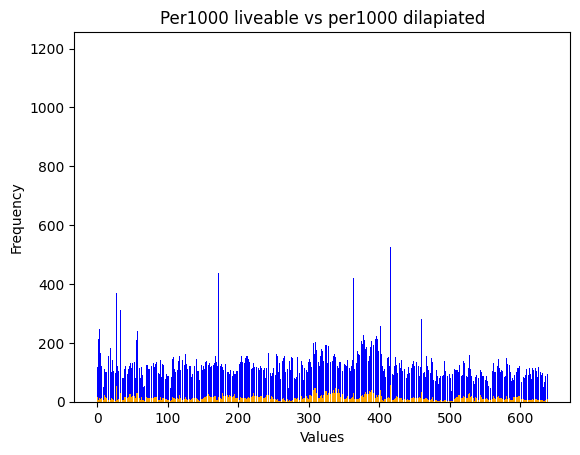

In [19]:
data1=census['per1000liveable']
data2=census['per1000dilapiated']

x = np.arange(len(districtList))
plt.bar(x, data1, color='blue')
plt.bar(x[-len(data2):], data2, color='orange')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Per1000 liveable vs per1000 dilapiated')



plt.show()

25) The rural development department has requested a report on the healthcare situation in rural areas as compared to urban areas. Write a query to find the number of hospital beds and government hospital beds per 1 lakh people for rural and urban areas separately for each state, along with the difference between them


In [4]:
import pandas as pd

In [7]:
hospitaldata=pd.read_csv('clean_Data/Clean_Data/hospitals_clean.csv',usecols=['State/UT','Population','HospitalBeds'])

In [8]:
hospitaldata.head(5)

State/UT  HospitalBeds  Population
0                  Lakshadweep           250       64473
1                Daman and Diu           298      243247
2       Dadra and Nagar Haveli           568      343709
3                       Sikkim          1145      610577
4  Andaman and Nicobar Islands          1246      380581

In [16]:
housingdata=pd.read_csv('clean_Data/Clean_Data/government_hospitals.csv',usecols=['State/UT','Rural_Government_Beds','Urban_Government_Beds'])

In [17]:
housingdata.head()

State/UT  Rural_Government_Beds  Urban_Government_Beds
0                Daman and Diu                    240                      0
1                  Lakshadweep                    300                      0
2       Dadra and Nagar Haveli                    273                    316
3                   Chandigarh                      0                    778
4  Andaman and Nicobar Islands                    575                    500

In [18]:
ft=hospitaldata.merge(housingdata,how='inner',on="State/UT",suffixes=('_rural','_urban'))

In [19]:
ft

State/UT  HospitalBeds  Population  \
0                   Lakshadweep           250       64473   
1                 Daman and Diu           298      243247   
2        Dadra and Nagar Haveli           568      343709   
3                        Sikkim          1145      610577   
4   Andaman and Nicobar Islands          1246      380581   
5                      Nagaland          1944     1978502   
6                       Mizoram          2312     1097206   
7             Arunachal Pradesh          2320     1383727   
8                       Manipur          2562     2855794   
9                           Goa          2666     1458545   
10                   Chandigarh          3756     1055450   
11                  Pondicherry          4462     1247953   
12                    Meghalaya          4585     2966889   
13                      Tripura          4895     3673917   
14                  Uttarakhand          6660    10086292   
15                    Jharkhand          7404    32988134   
16             Himachal Pradesh          8706     6864602   
17            Jammu and Kashmir         11342    12267013   
18                       Punjab         13527    27743338   
19                      Haryana         13841    25351462   
20                 Chhattisgarh         14354    25545198   
21                       Orissa         16497    41974218   
22                    Telangana         17358    35193978   
23                        Bihar         17796   104099452   
24                        Assam         19115    31205576   
25                        Delhi         20572    16787941   
26               Madhya Pradesh         38140    72626809   
27                       Kerala         39511    33406061   
28                      Gujarat         41129    60439692   
29                  West Bengal         51163    91276115   
30                    Rajasthan         51844    68548437   
31                    Karnataka         56333    61140305   
32                Uttar Pradesh         58310   199812341   
33               Andhra Pradesh         60799    49386799   
34                  Maharashtra         68998   112374333   
35                   Tamil Nadu         72616    72147030   

    Rural_Government_Beds  Urban_Government_Beds  
0                     300                      0  
1                     240                      0  
2                     273                    316  
3                     260                   1300  
4                     575                    500  
5                     630                   1250  
6                     604                   1393  
7                    2136                    268  
8                     730                    697  
9                    1405                   1608  
10                      0                    778  
11                     96                   3473  
12                   1970                   2487  
13                   1140                   3277  
14                   3284                   5228  
15                   5842                   4942  
16                   5665                   6734  
17                   7234                   4417  
18                   5805                  12128  
19                   6690                   4550  
20                   5070                   4342  
21                   6339                  12180  
22                   7668                  13315  
23                   6083                   5936  
24                  10944                   6198  
25                      0                  24383  
26                  10020                  18819  
27                  16865                  21139  
28                  11715                  20565  
29                  19684                  58882  
30                  21088                  10760  
31                  21072                  49093  
32                  39104                  37156  
33                   6480      

In [36]:
ft['bedsperrural']=(ft['Rural_Government_Beds']/ft['Population'] * 100000)

In [38]:
ft['bedsperUrban']=(ft['Urban_Government_Beds']/ft['Population'] * 100000)

In [40]:
ft['difference']=abs(ft['bedsperrural']-ft['bedsperUrban'])

In [41]:
ft

State/UT  HospitalBeds  Population  \
0                   Lakshadweep           250       64473   
1                 Daman and Diu           298      243247   
2        Dadra and Nagar Haveli           568      343709   
3                        Sikkim          1145      610577   
4   Andaman and Nicobar Islands          1246      380581   
5                      Nagaland          1944     1978502   
6                       Mizoram          2312     1097206   
7             Arunachal Pradesh          2320     1383727   
8                       Manipur          2562     2855794   
9                           Goa          2666     1458545   
10                   Chandigarh          3756     1055450   
11                  Pondicherry          4462     1247953   
12                    Meghalaya          4585     2966889   
13                      Tripura          4895     3673917   
14                  Uttarakhand          6660    10086292   
15                    Jharkhand          7404    32988134   
16             Himachal Pradesh          8706     6864602   
17            Jammu and Kashmir         11342    12267013   
18                       Punjab         13527    27743338   
19                      Haryana         13841    25351462   
20                 Chhattisgarh         14354    25545198   
21                       Orissa         16497    41974218   
22                    Telangana         17358    35193978   
23                        Bihar         17796   104099452   
24                        Assam         19115    31205576   
25                        Delhi         20572    16787941   
26               Madhya Pradesh         38140    72626809   
27                       Kerala         39511    33406061   
28                      Gujarat         41129    60439692   
29                  West Bengal         51163    91276115   
30                    Rajasthan         51844    68548437   
31                    Karnataka         56333    61140305   
32                Uttar Pradesh         58310   199812341   
33               Andhra Pradesh         60799    49386799   
34                  Maharashtra         68998   112374333   
35                   Tamil Nadu         72616    72147030   

    Rural_Government_Beds  Urban_Government_Beds  bedsperrural  bedsperUrban  \
0                     300                      0    465.311060      0.000000   
1                     240                      0     98.665143      0.000000   
2                     273                    316     79.427655     91.938238   
3                     260                   1300     42.582672    212.913359   
4                     575                    500    151.084789    131.378077   
5                     630                   1250     31.842273     63.179112   
6                     604                   1393     55.048915    126.958839   
7                    2136                    268    154.365709     19.367982   
8                     730                    697     25.562068     24.406522   
9                    1405                   1608     96.328876    110.246856   
10                      0                    778      0.000000     73.712634   
11                     96                   3473      7.692597    278.295737   
12                   1970                   2487     66.399518     83.825178   
13                   1140                   3277     31.029552     89.196354   
14                   3284                   5228     32.559042     51.832725   
15                   5842                   4942     17.709398     14.981144   
16                   5665                   6734     82.524814     98.097457   
17                   7234                   4417     58.971161     36.007136   
18                   5805                  12128     20.923942     43.714999   
19                   6690                   4550     26.389011     17.947683   
20                   5070                   4342     19.847174     16.997324   
21   